In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import geopandas as gpd
import mapclassify

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Objetivos del EDA / Objective

To analyse the domestic violence cases in Colombia between January 2010 and May 2021

- Which town have highest cases numbers of all.
- Cases per year .
- The assaults are more frequently committed by using what
- Who amongst the men and women suffer more domestic violence cases.

-----------------------------------------------------------------------------------------------------

Analisar los casos de violencia domestica en Colombia entre Enero de 2010 y Mayo de 2021

- Cuales son los municipios con mayor numero de casos
- Total de casos por año
- Los actos de violencia son mas frecuentemente perpretados usando que tipo de armas
- Que genero sufre mas casos de violencia domestica


## Limpieza de datos / Data cleaning

In [2]:
df = pd.read_csv('/kaggle/input/domestic-violence-in-colombia/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv')
df.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
5,SUCRE,SINCELEJO (CT),70001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
6,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,2
7,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,2
8,VALLE,TULUÁ,76834000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
9,HUILA,PITALITO,41551000,ARMA DE FUEGO,1/01/2010,FEMENINO,ADULTOS,1


In [3]:
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format= "%d/%m/%Y", errors='coerce')

In [6]:
df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1


In [9]:
df['FECHA HECHO'] = df['FECHA HECHO'].fillna(np.nan)
df.dropna()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
476957,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-01-05,FEMENINO,ADULTOS,1
476958,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-01-14,FEMENINO,ADULTOS,1
476959,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-03-26,FEMENINO,ADULTOS,1
476960,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-03-27,FEMENINO,ADULTOS,1


In [11]:
df['CODIGO DANE'] = df['CODIGO DANE'].replace({'NO REPORTA':0,
                                                '-':0})
df['CODIGO DANE'] = df['CODIGO DANE'].astype(int)
df = df[df['CODIGO DANE'] != 0]

In [12]:
df['GENERO'] = df['GENERO'].fillna('NO REPORTA')
df['GENERO'] = df['GENERO'].replace({'-':'NO REPORTA'})
df['GENERO'].unique()

array(['MASCULINO', 'FEMENINO', 'NO REPORTA'], dtype=object)

In [13]:
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].fillna('NO REPORTADO')
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].replace({'-':'NO REPORTADO',
                                                'NO REPORTA':'NO REPORTADO'})
df['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTADO', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'ESCOPOLAMINA'], dtype=object)

In [14]:
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].fillna('NO REPORTA')

In [15]:
df.sort_values('FECHA HECHO')

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
90,TOLIMA,IBAGUÉ (CT),73001000,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,3
89,SUCRE,SINCELEJO (CT),70001000,CONTUNDENTES,2010-01-01,MASCULINO,ADULTOS,1
88,SUCRE,SINCELEJO (CT),70001000,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,5
87,SUCRE,SANTIAGO DE TOLÚ,70820000,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
456777,ANTIOQUIA,RIONEGRO,5615000,CONTUNDENTES,2021-05-31,MASCULINO,ADULTOS,1
472587,HUILA,SAN AGUSTÍN,41668000,SIN EMPLEO DE ARMAS,2021-05-31,FEMENINO,ADOLESCENTES,1
457077,ATLÁNTICO,BARRANQUILLA (CT),8001000,CONTUNDENTES,2021-05-31,FEMENINO,ADULTOS,1
469126,CÓRDOBA,TIERRALTA,23807000,SIN EMPLEO DE ARMAS,2021-05-31,FEMENINO,ADULTOS,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475339 entries, 0 to 476961
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DEPARTAMENTO  475339 non-null  object        
 1   MUNICIPIO     475339 non-null  object        
 2   CODIGO DANE   475339 non-null  int64         
 3   ARMAS MEDIOS  475339 non-null  object        
 4   FECHA HECHO   475339 non-null  datetime64[ns]
 5   GENERO        475339 non-null  object        
 6   GRUPO ETARIO  475339 non-null  object        
 7   CANTIDAD      475339 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 32.6+ MB


In [35]:
df[df.duplicated()]

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
1034,ATLÁNTICO,SOLEDAD,8758000,NO REPORTADO,2010-01-20 00:00:00,FEMENINO,ADULTOS,1
2119,SUCRE,SINCELEJO (CT),70001000,NO REPORTADO,2010-02-10 00:00:00,FEMENINO,ADULTOS,1
2212,SUCRE,SINCELEJO (CT),70001000,NO REPORTADO,2010-02-12 00:00:00,FEMENINO,ADULTOS,1
3794,CUNDINAMARCA,MADRID,25430000,NO REPORTADO,2010-03-17 00:00:00,FEMENINO,ADULTOS,1
3795,CUNDINAMARCA,MADRID,25430000,NO REPORTADO,2010-03-17 00:00:00,MASCULINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
454530,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,2020-12-31 00:00:00,FEMENINO,ADULTOS,1
454531,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,2020-12-31 00:00:00,MASCULINO,ADULTOS,1
454532,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,2020-12-31 00:00:00,FEMENINO,ADULTOS,1
454534,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,2020-12-31 00:00:00,FEMENINO,ADULTOS,1


In [36]:
# df.to_csv('violencia_intrafamiliar_cleaned.csv')

Finally we export and save the cleaning df to make some interactive dashboard using Power BI
___
Finalmente guardamos la base de datos limpia para su posterior uso en Power Bi

## Variable Municipio / Town var

In [17]:
df_agrupado = df.groupby('CODIGO DANE')['MUNICIPIO'].agg(['count'])
df_agrupado.sort_values('count', ascending=False)



,count
CODIGO DANE,
11001000,53389
5001000,21953
76001000,18859
68001000,10408
50001000,9654
...,...
27135000,3
15550000,3
13655000,2


In [38]:
df['MUNICIPIO'].value_counts()

BOGOTÁ D.C. (CT)         53792
MEDELLÍN (CT)            22032
CALI (CT)                18958
BUCARAMANGA (CT)         10420
VILLAVICENCIO (CT)        9675
                         ...  
SÁCAMA                       3
JORDÁN                       3
SAN JACINTO DEL CAUCA        2
ZAPAYÁN                      1
BOJAYÁ                       1
Name: MUNICIPIO, Length: 1021, dtype: int64

Now we can see the more affected town which is Bogota with about 53500 cases in total, followed by Medellin with 22000 cases and Cali with almost 19000
___
Podemos ver que las ciudades con mayor numero de casos son Bogota, Medellin y Cali
___
The next step is to import a df that allow us to print a map with all of the Colombia's towns

A continuacion importaremos el siguiente df que contiene los datos que nos permitiran graficar todos los municipios del pais

In [39]:
municipios = gpd.read_file(r'/kaggle/input/municipios')
municipios['cod_dane'] = municipios['cod_dane'].astype(int)
municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          1122 non-null   object  
 1   TOTPOP_CY   1122 non-null   int64   
 2   Shape__Are  1122 non-null   float64 
 3   Shape__Len  1122 non-null   float64 
 4   cod_dane    1122 non-null   int64   
 5   geometry    1122 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(1)
memory usage: 52.7+ KB


In [40]:
colombia = municipios.merge(df_agrupado, left_on='cod_dane', right_on='CODIGO DANE', how='outer')
colombia.sort_values(by='count', ascending=False)

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry,count
148,11001,7822431,1.657425e+09,414367.022837,11001000,"POLYGON ((-8245739.733 538942.534, -8245676.51...",53792.0
0,05001,2559097,3.798647e+08,107257.930213,5001000,"POLYGON ((-8423087.868 710530.773, -8423036.11...",22032.0
1005,76001,2275444,5.675798e+08,122261.000357,76001000,"POLYGON ((-8526382.122 395080.815, -8526235.24...",18958.0
845,68001,613584,1.537965e+08,74993.696676,68001000,"POLYGON ((-8135554.057 808170.712, -8135515.84...",10420.0
686,50001,550828,1.328228e+09,238293.750262,50001000,"POLYGON ((-8203821.065 477836.261, -8203644.28...",9675.0
...,...,...,...,...,...,...,...
1106,94887,2031,1.024251e+10,806421.641876,94887000,"POLYGON ((-7655711.852 270102.526, -7655437.69...",NaN
1107,94888,972,8.481439e+09,689048.873260,94888000,"POLYGON ((-7729845.435 320779.271, -7729485.19...",NaN
1114,97511,4467,1.431340e+10,983132.259689,97511000,"POLYGON ((-7994352.550 99733.587, -7957161.460...",NaN
1116,97777,784,5.350430e+09,609482.711870,97777000,"POLYGON ((-7803780.769 230828.009, -7803942.97...",NaN


<AxesSubplot:>

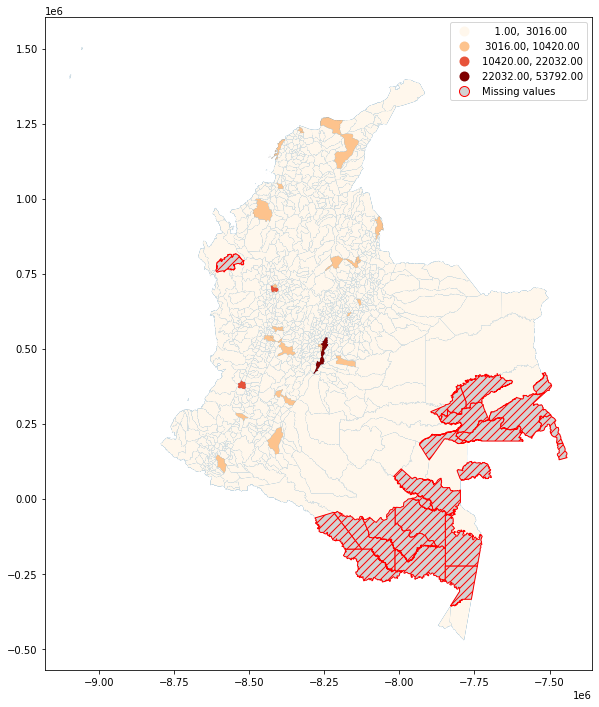

In [41]:
axis = municipios.plot(figsize = (20,12))
colombia.plot(column= 'count', ax = axis, legend = True, cmap='OrRd', scheme='natural_breaks', k=4, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"})

Great! now we got this cool map and I did it with 4 quantiles so its possible to see the most affected towns that we already know wich are: Bogota, Medellin, Cali and so on. We graphed the map by municipality and not by department to avoid bias. For example: Bogota, Medellin and Cali would make their departments appear with a large number of cases since these main cities are what actually accumulate the majority of the cases, not the other municipalities in the department.
___
Ahora tenemos un grafico que nos permite visualizar los municipios mas criticos y una cantidad considerable de municipios sin denuncias, esto se podria deber a diferentes causas, principalmente observamos que son las zonas mas retiradas del pais aquellas que figuran sin denuncias. Cabe resaltar un municipio en el centro del pais en que quizas se podria presentar que no hubo casos de violencia domestica. Graficamos el mapa por municipio y no por departamento para evitar sesgos. Ejemplo: Bogota, Medellín y Cali harian que sus departamentos figurasen con una gran cantidad de casos siendo estas ciudades principales las que en realidad acumulan la mayoria de los casos, no los demas municipios del departamento

## Armas medios var

In [42]:
df['ARMAS MEDIOS'].value_counts(normalize=True)*100 

CONTUNDENTES                   51.354848
SIN EMPLEO DE ARMAS            22.806812
NO REPORTADO                   16.006365
ARMA BLANCA / CORTOPUNZANTE     7.981692
ESCOPOLAMINA                    0.809931
ARMA DE FUEGO                   0.487049
CORTOPUNZANTES                  0.244678
CORTANTES                       0.238597
PUNZANTES                       0.070028
Name: ARMAS MEDIOS, dtype: float64

We can take a look at the most used ways to commit the assault
___
Tenemos el porcentaje de armas mas usadas para cometer los asaltos, se presenta un bajo uso de armas de fuego, mientras que resaltan las armas contundentes(martillos, palos, etc) y el no uso de armas

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476954 entries, 0 to 476961
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476954 non-null  object
 1   MUNICIPIO     476954 non-null  object
 2   CODIGO DANE   476954 non-null  int64 
 3   ARMAS MEDIOS  476954 non-null  object
 4   FECHA HECHO   476954 non-null  object
 5   GENERO        476954 non-null  object
 6   GRUPO ETARIO  476954 non-null  object
 7   CANTIDAD      476954 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 32.7+ MB


## Genero / Gender var

In [44]:
df['GENERO'] = df['GENERO'].replace({'-':'NO REPORTA'})

In [45]:
df['GENERO'].value_counts()

FEMENINO      366893
MASCULINO     109757
NO REPORTA       304
Name: GENERO, dtype: int64

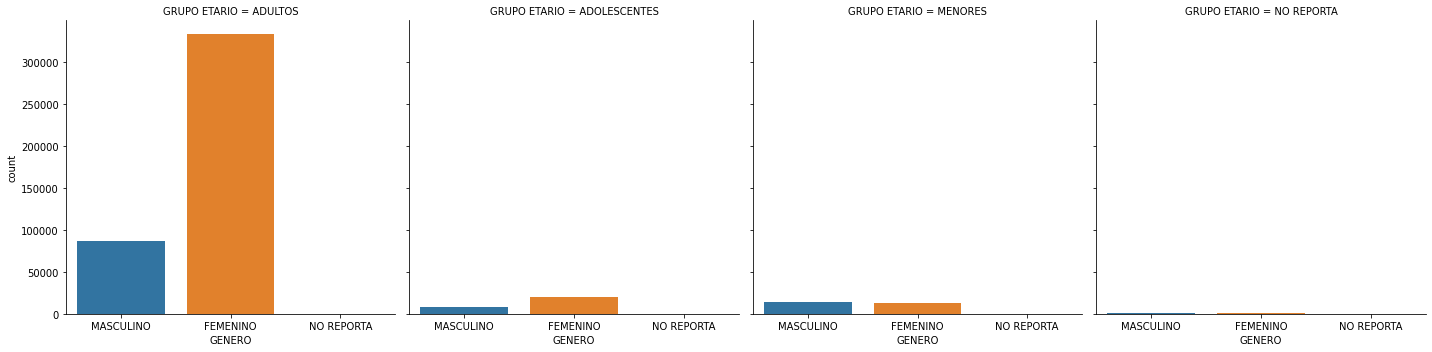

In [46]:
sns.catplot(x='GENERO', 
            data=df, 
            col='GRUPO ETARIO',
            kind='count')

The most affected sex by age category
___
El sexo mas afectado, a su vez separados por grupo etario, con una gran diferencia entre sexos pero con un numero considerable de casos de violencia para ambos

## Finally

The rest of the analisis is on a power BI dashboard
___
El resto del analisis lo haremos en una dashboard de power BI

I wish and I hope to receive some feedback, I'll appreciate it. I'm currently learning and maybe I could have done it too fast and made some mistakes so please let me know.
___
Agradecería cualquier comentario que me puedan hacer, algun error o algo que haya pasado por alto. Actualmente me encuentro aprendiendo y estoy muy emocionado por hacer y explorar datasets, esa misma emocion me podria llevar a cometer errores.